In [27]:
import pandas as pd


In [28]:
df = pd.read_csv("VGChartz 2024.csv")
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


# Exploratory Data Analysis (EDA)
This section provides a quick overview of the sales dataset, including missing values, summary statistics, unique values, and visualizations.

In [29]:
# Check for missing values
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [67]:
# checking data consistency 

df["release_year"] = df["release_date"].dt.year
df.groupby("release_year")["total_sales"].sum()
# removing head and tail data for years that dont have sufficient data

years_to_remove = [1977,2018]
# filtering years from release date
df = df[(df["release_year"] >= 1977) & (df["release_year"] <= 2018)]

In [66]:
df["release_date"]

0       2013-09-17
1       2014-11-18
2       2002-10-28
3       2013-09-17
4       2015-11-06
           ...    
64011   2016-08-11
64012   2020-07-30
64013   2020-07-30
64014   2019-02-28
64015          NaT
Name: release_date, Length: 64016, dtype: datetime64[ns]

In [68]:
# Summary statistics for numeric columns
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year
count,6591.000000,18769.000000,12616.000000,6639.000000,12761.000000,15054.000000,53500,53500.000000
mean,7.219466,0.351288,0.265079,0.102425,0.150006,0.043205,2005-12-26 02:01:00.829906432,2005.481009
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1977-01-01 00:00:00,1977.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000,2000-10-05 00:00:00,2000.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000,2007-12-06 12:00:00,2007.000000
75%,8.300000,0.350000,0.280000,0.120000,0.140000,0.030000,2011-09-20 00:00:00,2011.000000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000,2018-12-31 00:00:00,2018.000000
std,1.456635,0.810204,0.495115,0.169068,0.393424,0.126903,NaN,8.135964


In [69]:
# Unique values for categorical columns
categorical_cols = ['title', 'console', 'genre', 'publisher', 'developer']
unique_counts = {col: df[col].nunique() for col in categorical_cols}
unique_counts

{'title': 35508,
 'console': 77,
 'genre': 20,
 'publisher': 3164,
 'developer': 7512}

In [70]:
# Top 5 games by total sales
df[['title', 'total_sales']].sort_values(by='total_sales', ascending=False).head()

,title,total_sales
0,Grand Theft Auto V,20.32
1,Grand Theft Auto V,19.39
2,Grand Theft Auto: Vice City,16.15
3,Grand Theft Auto V,15.86
4,Call of Duty: Black Ops 3,15.09


/var/folders/vb/3jgmd9r10vj286ss2tn5s_9m0000gn/T/ipykernel_95642/2437107420.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_consoles.index, y=top_consoles.values, palette='viridis')


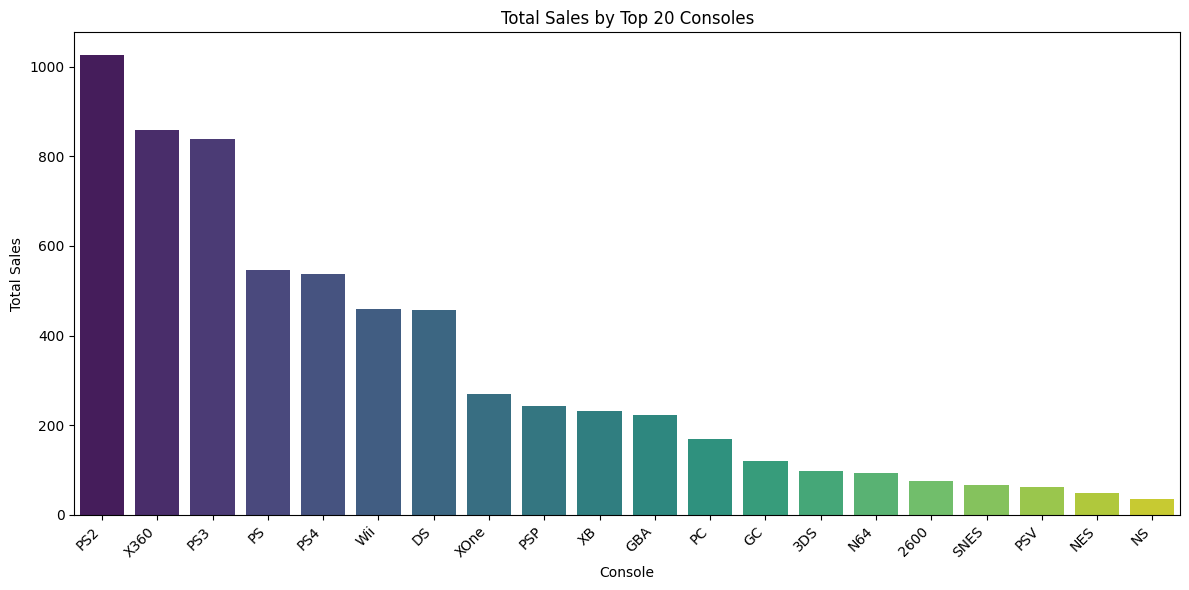

In [71]:
# Sales distribution by top 20 consoles (bar plot for clarity)
import matplotlib.pyplot as plt
import seaborn as sns
console_sales = df.groupby('console')['total_sales'].sum().sort_values(ascending=False)
top_consoles = console_sales.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_consoles.index, y=top_consoles.values, palette='viridis')
plt.title('Total Sales by Top 20 Consoles')
plt.ylabel('Total Sales')
plt.xlabel('Console')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

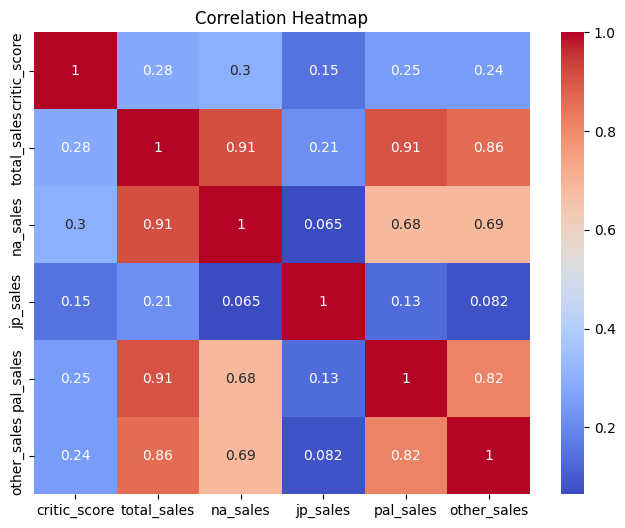

In [72]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/vb/3jgmd9r10vj286ss2tn5s_9m0000gn/T/ipykernel_95642/4149012523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.index, y=publisher_sales.values, palette="mako")


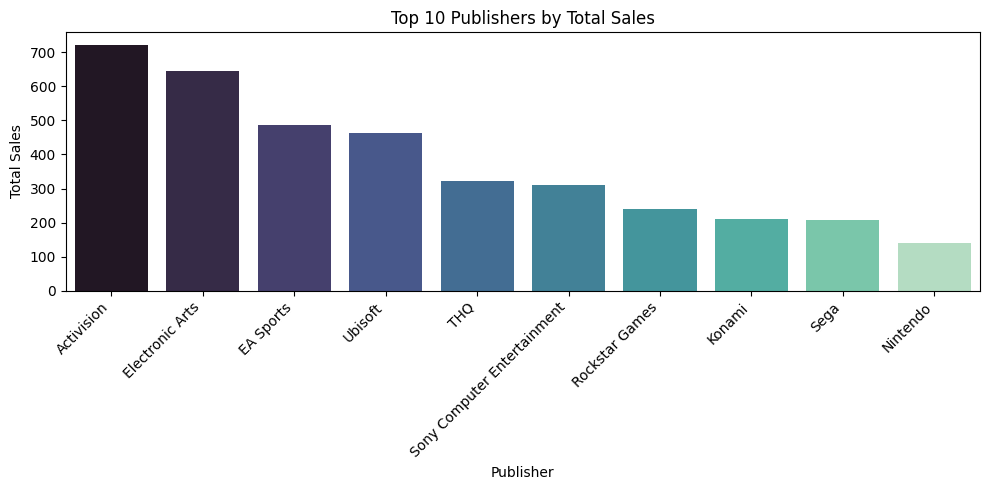

In [73]:
# Top 10 publishers by total sales
publisher_sales = (
    df.groupby("publisher")["total_sales"].sum().sort_values(ascending=False).head(10)
)
plt.figure(figsize=(10, 5))
sns.barplot(x=publisher_sales.index, y=publisher_sales.values, palette="mako")
plt.title("Top 10 Publishers by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Publisher")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


/var/folders/vb/3jgmd9r10vj286ss2tn5s_9m0000gn/T/ipykernel_95642/2770153238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")


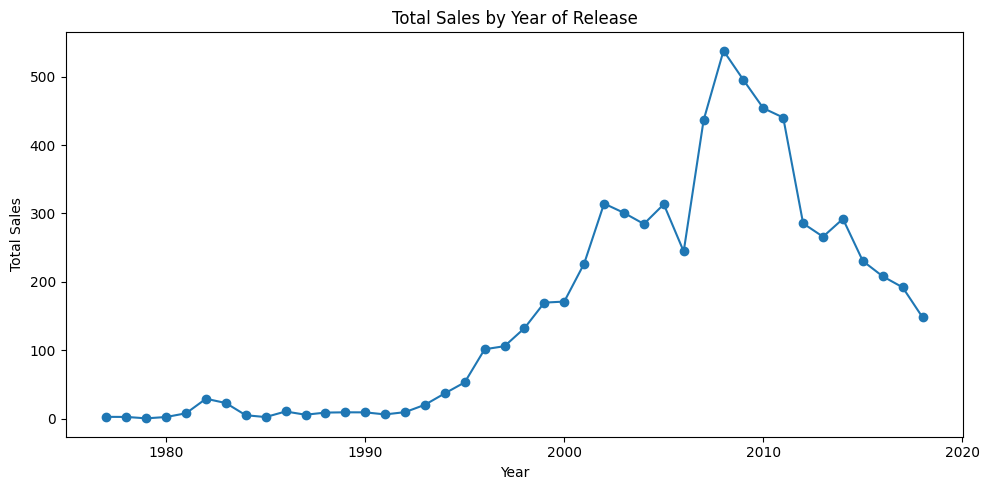

In [74]:
# Sales trends over time (by release_date)
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
sales_by_year = df.groupby(df["release_date"].dt.year)["total_sales"].sum()
plt.figure(figsize=(10, 5))
sales_by_year.plot(kind="line", marker="o")
plt.title("Total Sales by Year of Release")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


/var/folders/vb/3jgmd9r10vj286ss2tn5s_9m0000gn/T/ipykernel_95642/1122946085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="crest")


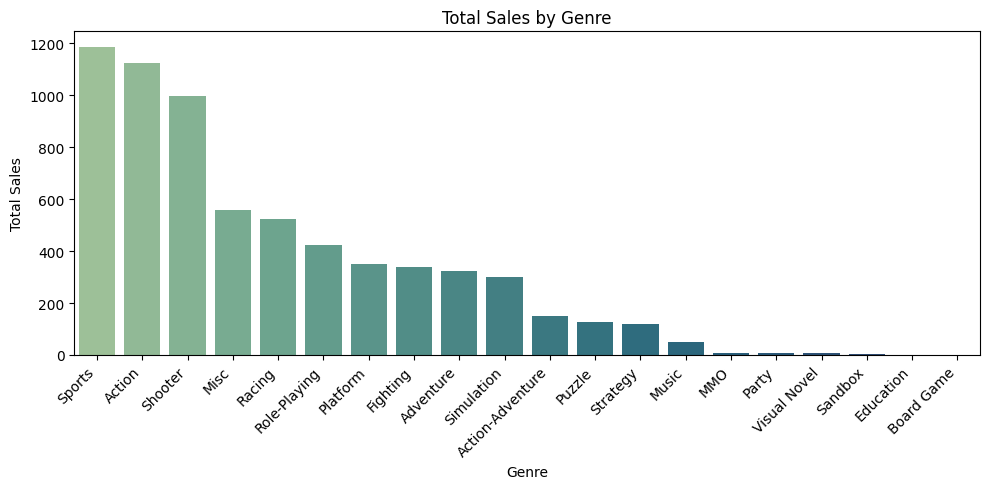

In [75]:
# Genre popularity by total sales
genre_sales = df.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="crest")
plt.title("Total Sales by Genre")
plt.ylabel("Total Sales")
plt.xlabel("Genre")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


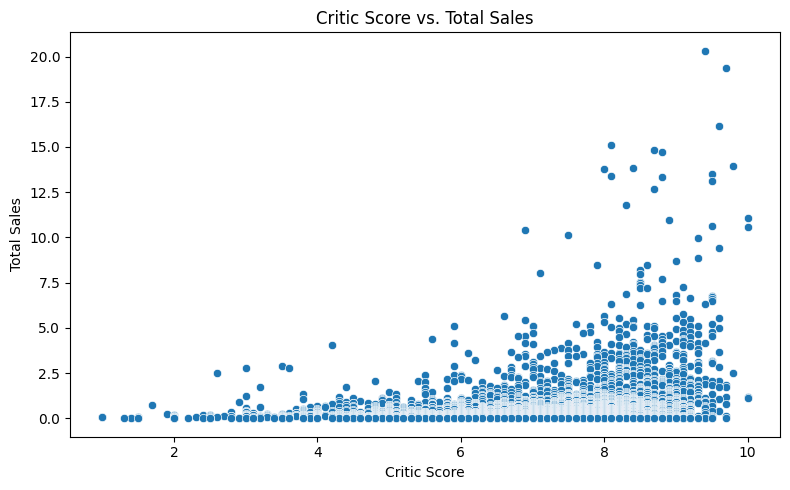

In [76]:
# Critic score vs. total sales (scatter plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="critic_score", y="total_sales", data=df)
plt.title("Critic Score vs. Total Sales")
plt.xlabel("Critic Score")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


# Sales Forecast
This section forecasts future total sales using historical yearly data.

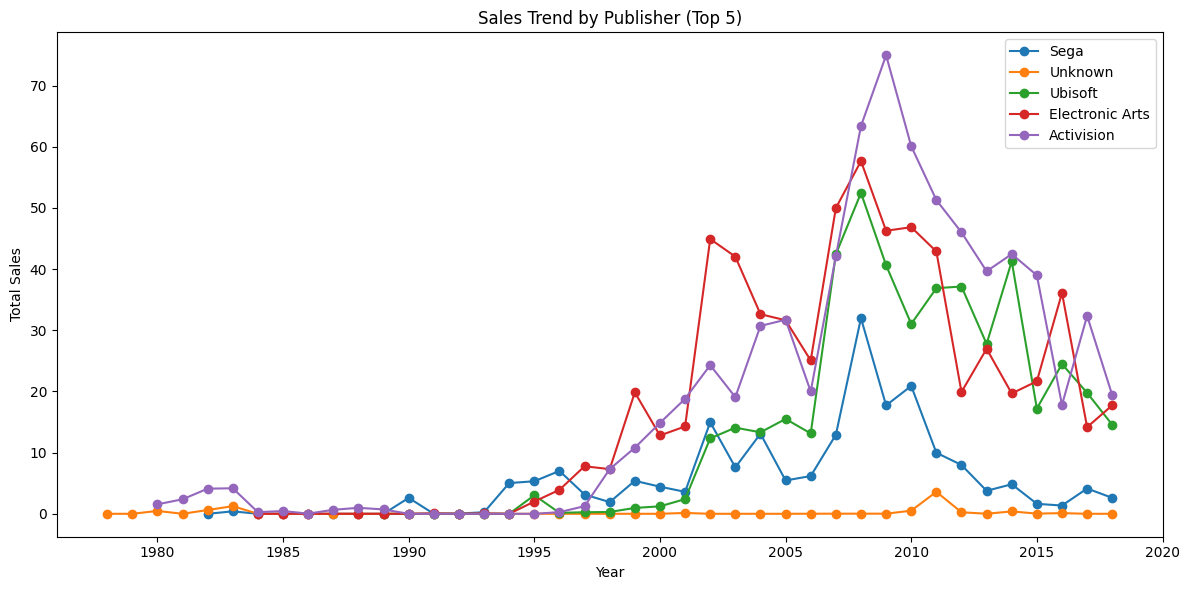

In [77]:
# Sales trend by publisher (top 5 publishers)
top_publishers = df['publisher'].value_counts().head(5).index
plt.figure(figsize=(12,6))
for publisher in top_publishers:
    publisher_sales = df[df['publisher'] == publisher].groupby(df['release_date'].dt.year)['total_sales'].sum().sort_index()
    plt.plot(publisher_sales.index, publisher_sales.values, marker='o', label=publisher)
plt.title('Sales Trend by Publisher (Top 5)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()